# Regresión lineal

Para este ejemplo, el dataset de ejemplo de Regresion Lineal de Kaggle . Podeis encontrar el dataset y la explicación en el siguiente linkÑ https://www.kaggle.com/andonians/random-linear-regression/data. Poner los datasets, el train.csv y el test.csv en una carpeta que se llame Data. Para haceros la vida más facil, he *giteado* tambien los datos en la carpeta Data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Vamos ahora a cojer los datos y a visualizarlos. Para hacernos la vida más fácil, tal y como ya hicimos en el ejemplo anterior, usaremos DataFrames.

In [3]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Vamos ahora a mostrar los datos para entenderlos:

Este dataset contiene (699, 1) elementos en el test set
Este dataset contiene (300, 1) elementos en el test set


<Figure size 1440x1440 with 0 Axes>

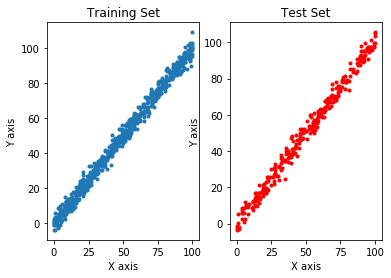

In [4]:
plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x_train, y_train,'.')
ax1.set(xlabel='X axis', ylabel='Y axis')
ax1.set(title='Training Set')

ax2.plot(x_test, y_test,'.',color='red')
ax2.set(xlabel='X axis', ylabel='Y axis')
ax2.set(title='Test Set')

print("Este dataset contiene {} elementos en el trainingset".format(x_train.shape))
print("Este dataset contiene {} elementos en el testset".format(x_test.shape))

Ahora que entendemos como son los datos, vamos a usar directamente la libreria de Scikit Learn para ver la solución.

In [7]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("El R2 es: {}".format(r2_score(y_test,y_pred)))
print("El pendiente es: {}".format(clf.coef_))
print("El intercept es: {}".format(clf.intercept_))

El R2 es: 0.9888014444327563
El pendiente es: [1.00065638]
El intercept es: -0.10726546430097983


Vemos que la regresión lineal que hemos generado nos da un $R^2$ elevado, vemos entonces que hemos hecho una buena aproximación a los datos. ¿Qué pasa si no normalizamos? Veamos que recta de regresión lineal hemos encontrado.

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='black')
plt.show()

Veamos ahora los residuales:

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test-y_pred,color='red')
plt.plot(x_test,y_pred-y_pred,color='black')
plt.show()

Vemos que estos residuales son aleatorios, hemos hecho un buen fit!

# Nuestro Regresor Lineal
No vamos a usar **scikit**, sinó que vamos crear nosotros mismo el codigo que implemente la regresión lineal. Esto sólo lo haremos con este algoritmo ya que es sencillo y de esta manera quedará la logica de como se entrena un modelo más clara. Y nunca se sabe si tendrás que acabar haciendo algo parecido en un ESP32 por ejemplo...

Emperzaremos por con un *toy example*. Los datos que tenemos son los siguientes:

In [ ]:
x_train = np.array([1,2,3,4,5])
y_train = np.array([5,7,9,11,13])

Vamos a ver que forma tienen estos datos:

In [ ]:
plt.plot(x_train,y_train,'.')
plt.show()

Es fácil de ver que la recta que cumple esto es: $y = x*m + b = x*2 + 3$. Veamoslo:

In [ ]:
y = 2*x_train + 3
plt.plot(x_train,y,color="red")
plt.plot(x_train,y_train,'.')
plt.show()

Vamos ahora a usar MSE y Gradient Desccent para encontrar esta recta:

In [ ]:
n = len(x_train)
alpha = 0.01

a_0 = 0
a_1 = 0

epochs = 10000

for i in range(epochs):
    # Calcula el valor y el error que cometemos.
    y_predicted = a_0 + a_1 * x_train
    error = y_train - y_predicted 
    
    # Calcula el valor de la función de coste.
    mean_sq_er = (1/n) * np.sum(error**2)
    
    # Usamos Gradient Descent para encontrar de manera mas rápida el valor de m y b (a_1 y a_0 respectivamente.)
    a_0 = a_0 - alpha * (-2/n) * np.sum(error) 
    a_1 = a_1 - alpha * (-2/n) * np.sum(error * x_train)
 
    if i%50 ==0 :
        print("a_1={}, a_0={}, MSE={} iteration{}.".format(a_1,a_0,mean_sq_er,i))
    
print("a_1={}, a_0={}, MSE={} iteration{}.".format(a_1,a_0,mean_sq_er,i))

## Propuesta
Usando el dataset anterior, escojer aleatoriamente 100 puntos y calcular vosotros mismos la Regresión lineal.